In [1]:
import os
import random
import glob
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
random.seed(42)
num_images = 25

## Copy images

In [3]:
if False:
    for model in ['gan','sd_dreambooth','sd_finetuning','sd_lora/1e_5/sd_lora_scale1','unconditional']:
        for label in ['B','C','F','H','V']:
            
            selected_imgs = random.sample(glob.glob(f'images/final/{model}/{label}/*'),num_images)

            if model == 'sd_lora/1e_5/sd_lora_scale1':
                os.makedirs(f'images/assessment/sd_lora/{label}',exist_ok=True)
                for img in selected_imgs:
                    shutil.copy2(img,f'images/assessment/sd_lora/{label}/')
            else:
                os.makedirs(f'images/assessment/{model}/{label}',exist_ok=True)    
                for img in selected_imgs:
                    shutil.copy2(img,f'images/assessment/{model}/{label}/')


## Interesting cases

Hand-picked from assessment scores with quality high/low and plausbility high/low.

In [17]:
#images = ['export/assessment/interesting_cases/finetuning_B_q5p3_image_857.png',
#          'export/assessment/interesting_cases/finetuning_B_q5p1_image_708.png',
#          'export/assessment/interesting_cases/dreambooth_H_q1p3_image_766.png',
#          'export/assessment/interesting_cases/finetuning_B_q1p1_image_255.png']

images = ['export/assessment/interesting_cases/finetuning_H_q5p3_image_846.png',
          'export/assessment/interesting_cases/gan_B_q5p1_image_4463.png',
          'export/assessment/interesting_cases/dreambooth_H_q1p3_image_702.png',
          'export/assessment/interesting_cases/finetuning_F_q1p1_image_214.png']

img_list = [Image.open(x).resize((512,512)) for x in images]

titles = ['(a)   Healthy | Quality: 5 | Plausibility: 3',
          '(b)   Bacterial | Quality: 5 | Plausibility: 1',
          '(c)   Healthy | Quality: 1 | Plausibility: 3',
          '(d)   Fungal | Quality: 1 | Plausibility: 1']

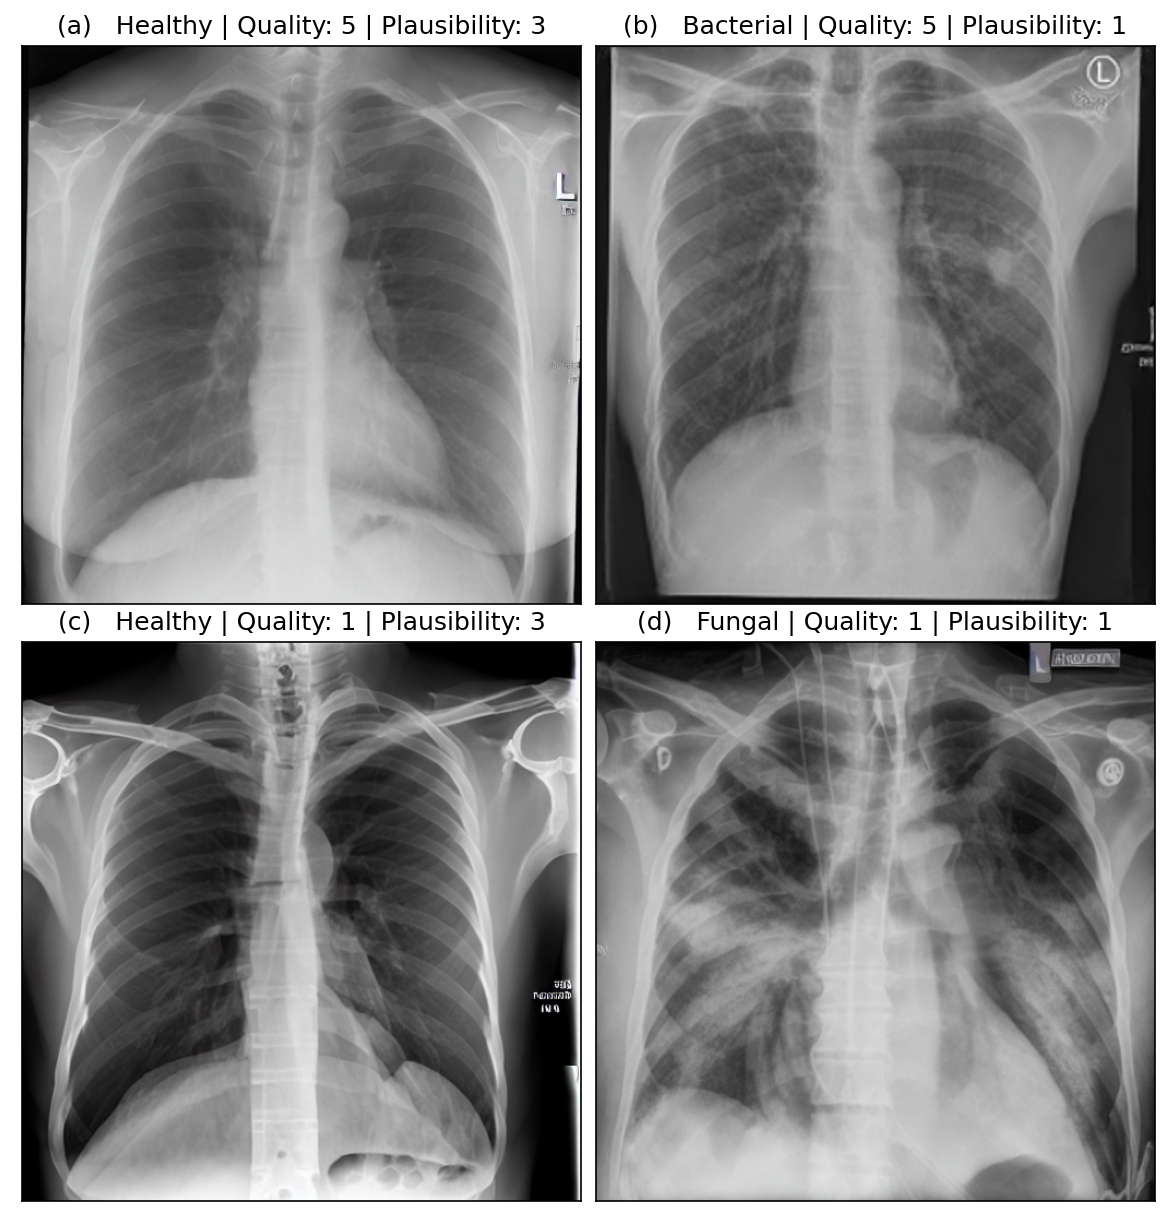

In [18]:
fig = plt.figure(figsize=(10, 10),dpi=150)

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                axes_pad=(-0.1,0.25),  # pad between axes in inch.
                share_all=True,
                aspect=False)

for i, (ax,im) in enumerate(zip(grid, img_list)):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

    ax.set_title(titles[i])

plt.savefig('export/assessment/interesting_cases/assessment_collection.pdf',bbox_inches='tight')
plt.show()